#  Vehicle Sales Prediction Project:

### The purpose of this app is to use an exisiting data set and predict future Vehicle Sales based off past data. This project is using a Linear Regression model.

<br>

#### The ML Model used is Linear Regression Supervised Learning Model

### <font color ="violet"> This is the First Code Block to Run </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Kaggle Data in Github and loaded here
url = "https://raw.githubusercontent.com/GabrielCMM74/C964-CS/main/datasets/cars-data-sales%20copy%204.csv"
df = pd.read_csv(url, encoding='utf-16')

# Remove rows with missing 'Price' column values
df.dropna(subset=['Price'], inplace=True)

# Exclude outliers in Data
upper_limit = df['Price'].quantile(0.99)
df = df[df['Price'] < upper_limit]

df['Brand_Name'] = df['Brand']

# Label encoding for 'Brand' for the full dataset
label_encoder = LabelEncoder()
df['Brand'] = label_encoder.fit_transform(df['Brand'])

# Sampling a subset of the data for quicker training - for demonstration, using 10% of the data
df_sample = df.sample(frac=0.1, random_state=42)

# Preparing data for SVM
X_svm = df_sample[['Year', 'Brand']]
y_svm = df_sample['Price'].values

column_transformer = ColumnTransformer([
    ("encoder", OneHotEncoder(sparse=True, handle_unknown='ignore'), ['Brand'])
], remainder='passthrough')

svm_pipeline = make_pipeline(
    column_transformer,
    SVR(kernel='linear', C=1.0, epsilon=0.2, max_iter=10000)
)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)
svm_pipeline.fit(X_train, y_train)

# Linear Regression model for future price predictions
X_lr = df[['Year', 'Brand']]
y_lr = df['Price']

lr_model = LinearRegression()
lr_model.fit(X_lr, y_lr)

# Function to predict future prices and demand
def predict_future_data(start_year, end_year, brand_encoder, df):
    future_years = np.arange(start_year, end_year + 1)
    future_data = pd.DataFrame({'Year': np.repeat(future_years, len(brand_encoder.classes_)), 'Brand': np.tile(np.arange(len(brand_encoder.classes_)), len(future_years))})
    
    # Predicting prices
    predicted_prices = lr_model.predict(future_data)
    future_data['Predicted Price'] = predicted_prices

    # Preparing demand data to more accurately represent Future Prices
    demand_per_year_brand = df.groupby(['Year', 'Brand']).size().reset_index(name='Demand')
    
    # Initialize future demand predictions
    future_data['Predicted Count'] = 0
    
    for brand in brand_encoder.classes_:
        brand_index = brand_encoder.transform([brand])[0]
        if demand_per_year_brand[demand_per_year_brand['Brand'] == brand_index].empty:
            continue
            
        # Linear Regression Model for demand
        demand_data = demand_per_year_brand[demand_per_year_brand['Brand'] == brand_index]
        X_demand = demand_data[['Year']]
        y_demand = demand_data['Demand']
        demand_model = LinearRegression()
        demand_model.fit(X_demand, y_demand)
        
        # Predicts future demand
        future_demand = demand_model.predict(future_data[future_data['Brand'] == brand_index][['Year']])
        future_data.loc[future_data['Brand'] == brand_index, 'Predicted Count'] = future_demand

    future_data['Brand'] = brand_encoder.inverse_transform(future_data['Brand'])  # Convert back to brand names
    return future_data

# Predict future prices and demand
future_data = predict_future_data(2024, 2050, label_encoder, df)

# Accuracy Metrics 
predictions = svm_pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions) * 100

print("\n\nAccuracy Metrics for SVM")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}%")




Accuracy Metrics for SVM
Mean Squared Error (MSE): 701308366.04
R-squared: 11.03%


### <font color ="violet"> This is the Second Code Block to Run </font>




Numerical Data Statistics:


,count,mean,std,min,25%,50%,75%,max
Brand,62021.0,8.992,6.710,0.0,4.0,6.0,17.0,20.0
Year,62021.0,2021.238,8.299,215.0,2020.0,2023.0,2023.0,2024.0
Mileage,24974.0,53026.804,44868.608,0.0,19785.0,40943.0,74954.0,405187.0
Price,62021.0,52708.619,28460.633,2000.0,33170.0,47939.0,65945.0,195895.0



Categorical Data Statistics:


,count,unique,top,freq
Model,62021,319,F-150,3561
Status,62021,3,New,37046
Dealer,61831,5784,Ourisman Lexus,154
Brand_Name,62021,21,Ford,13787



Distribution of 'Price':


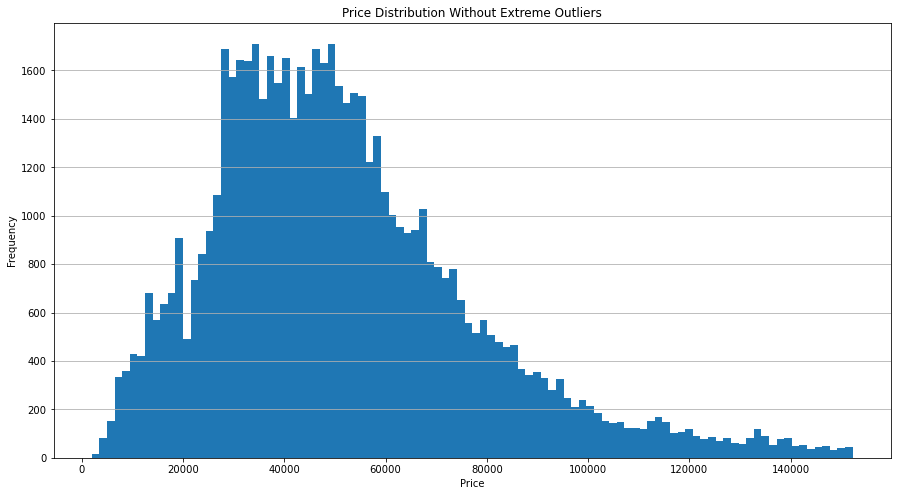

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Setting display options for larger and clearer dataframe visuals
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000) 
pd.set_option('display.colheader_justify', 'center') 
pd.set_option('display.precision', 3) 

# Remove rows with missing 'Price' column values
df.dropna(subset=['Price'], inplace=True)

def enhanced_describe(df):
    # Numerical Data Description
    numerical_stats = df.describe().transpose()

    # Categorical Data Description
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_stats = pd.DataFrame(index=categorical_columns, columns=['count', 'unique', 'top', 'freq'])
    for column in categorical_columns:
        categorical_stats.loc[column, 'count'] = df[column].count()
        categorical_stats.loc[column, 'unique'] = df[column].nunique()
        categorical_stats.loc[column, 'top'] = df[column].mode()[0]
        categorical_stats.loc[column, 'freq'] = df[column].value_counts().iloc[0]

    # Combine and Display Visuals
    print("\n\n")
    print("Numerical Data Statistics:")
    display(HTML(numerical_stats.to_html(classes='table table-striped')))

    print("\nCategorical Data Statistics:")
    display(HTML(categorical_stats.to_html(classes='table table-striped')))

    print("\nDistribution of 'Price':")

    upper_limit = df['Price'].quantile(0.99)
    filtered_prices = df[df['Price'] < upper_limit]['Price']

    # Plot the histogram of prices without extreme outliers
    plt.figure(figsize=(15, 8))
    filtered_prices.plot(kind='hist', bins=100, title='Price Distribution Without Extreme Outliers')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Calling the Function
enhanced_describe(df)

### <font color ="violet"> This is the Third Code Block to Run </font>

In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Test cases for Visualizations
assert 'future_data' in globals(), "Error: 'future_data' is not accessible in the current scope."
assert isinstance(future_data, pd.DataFrame), "Error: 'future_data' is not a pandas DataFrame as expected."

assert 'df' in globals(), "Error: 'df' is not accessible in the current scope."
assert isinstance(df, pd.DataFrame), "Error: 'df' is not a pandas DataFrame as expected."

assert 'label_encoder' in globals(), "Error: 'label_encoder' is not accessible in the current scope."
assert isinstance(label_encoder, LabelEncoder), "Error: 'label_encoder' is not an instance of sklearn's LabelEncoder as expected."

# If the script reaches this point without raising an assertion error, 
# it means all tests passed, and you can proceed with the rest of the code.


# Function to filter data based on user selection below
def filter_data(brand, year):
    if year > 2024:
        if brand != 'All Brands':
            filtered = future_data[(future_data['Brand_Name'] == brand) & (future_data['Year'] == year)].copy()
        else:
            filtered = future_data[future_data['Year'] == year].copy()
        return filtered
    else:
        if brand != 'All Brands':
            return df[(df['Brand_Name'] == brand) & (df['Year'] == year)]
        else:
            return df[df['Year'] == year]

def simulate_variance(filtered_df, historical_df):
    """Introduces simulated variance into future predictions based on historical data."""
    historical_variance = historical_df['Price'].std()
    adjustment_factor = np.random.normal(0, historical_variance, size=len(filtered_df))
    filtered_df['Adjusted Price'] = filtered_df['Predicted Price'] + adjustment_factor
    return filtered_df



# Function for each visualization below - Updates with User Interaction
def plot_predicted_prices_with_bubble(filtered_df, selected_year):
    plt.figure(figsize=(14, 7))
    brand_col = 'Brand_Name' if 'Brand_Name' in filtered_df.columns else 'Brand'
    
    sns.scatterplot(data=filtered_df, x=brand_col, y='Predicted Price' if 'Predicted Price' in filtered_df.columns else 'Price',
                    size='Predicted Count' if 'Predicted Count' in filtered_df.columns else np.repeat(20, len(filtered_df)),
                    sizes=(20, 2000), alpha=0.5, legend='auto')
    
    plt.xlabel('Brand')
    plt.ylabel('Predicted Price' if 'Predicted Price' in filtered_df.columns else 'Price')
    plt.title(f'Price and Demand by Brand for {selected_year}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title='Number of Cars', labelspacing=1)
    plt.show()

def plot_violin(filtered_df, selected_year, historical_df):
    plt.figure(figsize=(14, 7))
    brand_col = 'Brand_Name' if 'Brand_Name' in filtered_df.columns else 'Brand'
    
    # Introduce simulated variance for future predictions
    if 'Predicted Price' in filtered_df.columns and selected_year > 2024:
        filtered_df = simulate_variance(filtered_df, historical_df)
        price_col = 'Adjusted Price'
    else:
        price_col = 'Price'
    
    sns.violinplot(x=brand_col, y=price_col, data=filtered_df)
    plt.title(f'Price Distribution by Brand for {selected_year}')
    plt.xlabel('Brand')
    plt.ylabel(price_col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def plot_aggregate_prices(filtered_df, selected_year, historical_df):
    plt.rcParams["figure.figsize"] = (14,7)
    brand_col = 'Brand_Name' if 'Brand_Name' in filtered_df.columns else 'Brand'
    
    if 'Predicted Price' in filtered_df.columns and selected_year > 2024:
        filtered_df = simulate_variance(filtered_df, historical_df)
        price_col = 'Adjusted Price'
        agg_price = filtered_df.groupby(brand_col)[price_col].agg(['median'])
    else:
        price_col = 'Price'
        agg_price = filtered_df.groupby(brand_col)[price_col].agg(['mean', 'median', 'min', 'max'])
    
    aggregate_prices = agg_price
    aggregate_prices.plot(kind='bar')
    plt.title(f'Aggregate Price Statistics for {selected_year}')
    plt.ylabel(price_col)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend(title='Statistic')
    plt.show()

    
# Update the function calls in the UI from User Selection
def update_visualizations(selected_brand, selected_year, historical_df=df):
    filtered_df = filter_data(selected_brand, selected_year)
    plot_predicted_prices_with_bubble(filtered_df, selected_year)
    plot_violin(filtered_df, selected_year, historical_df)
    plot_aggregate_prices(filtered_df, selected_year, historical_df)


# UI Components and Display setup 
brand_options = ['All Brands']
brand_dropdown = widgets.Dropdown(options=brand_options, value='All Brands', description='Brand:')
year_dropdown = widgets.Dropdown(options=np.arange(2024, 2051), value=2024, description='Year:')
predict_button = widgets.Button(description="Predict")


# Output for the plots
print("\n\n")
print("\nEnter year and press Predict:")
output = widgets.Output()

# Listens for User Click
def on_predict_button_clicked(b):
    with output:
        clear_output(wait=True)
        selected_brand = brand_dropdown.value
        selected_year = year_dropdown.value
        update_visualizations(selected_brand, selected_year)

predict_button.on_click(on_predict_button_clicked)

display(brand_dropdown, year_dropdown, predict_button, output)
on_predict_button_clicked(None)





Enter year and press Predict:


Dropdown(description='Brand:', options=('All Brands',), value='All Brands')

Dropdown(description='Year:', options=(2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,…

Button(description='Predict', style=ButtonStyle())

Output()

#### No further Data Security provisions required beyond coding best practices


### <font color ="blue"> Thank you! by Gabriel Coello </font>